### **Encoding and Outlier Removal In Machine Learning**

* In this file we learn about types of encoding which are mostly used in machine learning and oultiers and how to remove it from data columns.
* Encoding converts categorical data into numerical values using techniques like Label Encoding (assigning integers) or One-Hot Encoding (creating binary columns). Outlier Removal detects and removes extreme values using methods like the IQR technique to improve model accuracy. Both processes help prepare the data for better machine learning performance.

**1.Import necessary Libraries**

In [2]:
import numpy as np 
import pandas as pd 
import xlrd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

**2. Read the file**

In [3]:
df = pd.read_excel("E:\\Machine Learning\\global_superstore\\Global Superstore.xls")

**3. Basic Analysis of Data**

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
df.shape

(51290, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [7]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


In [8]:
df.isnull().sum()/len(df)*1000

Row ID              0.000000
Order ID            0.000000
Order Date          0.000000
Ship Date           0.000000
Ship Mode           0.000000
Customer ID         0.000000
Customer Name       0.000000
Segment             0.000000
City                0.000000
State               0.000000
Country             0.000000
Postal Code       805.147202
Market              0.000000
Region              0.000000
Product ID          0.000000
Category            0.000000
Sub-Category        0.000000
Product Name        0.000000
Sales               0.000000
Quantity            0.000000
Discount            0.000000
Profit              0.000000
Shipping Cost       0.000000
Order Priority      0.000000
dtype: float64

In [9]:
df.drop(columns = ['Postal Code'], inplace = True)

In [10]:
Numerical_columns = df.select_dtypes(include = [np.number]).columns
Categorical_columns = df.select_dtypes(include = ['object']).columns

In [11]:
print(Numerical_columns)
print("--------------------------------------------------------------------")
print(Categorical_columns)

Index(['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')
--------------------------------------------------------------------
Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Order Priority'],
      dtype='object')


### Visualizations

**4. Performing Visualizations**

* Boxplot :
* A boxplot, also known as a whisker plot, is a graphical representation of data distribution. It provides a summary using five key statistics:

1* Minimum: Smallest non-outlier value.

2* First Quartile (Q1): 25th percentile.

3* Median (Q2): 50th percentile.

4* Third Quartile (Q3): 75th percentile.

5* Maximum: Largest non-outlier value.

* Boxplots require a numerical column. If you have only categorical data, consider encoding the categories (e.g., label encoding) or switching to other visualizations like bar charts or heatmaps.

C:\Users\gkris\AppData\Local\Temp\ipykernel_15288\1170098129.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Sales'],df['Profit'], df['Discount'], df['Shipping Cost'], df['Quantity']], labels = ['Sales', 'Profit', 'Discount', 'Shipping Cost', 'Quantity'])


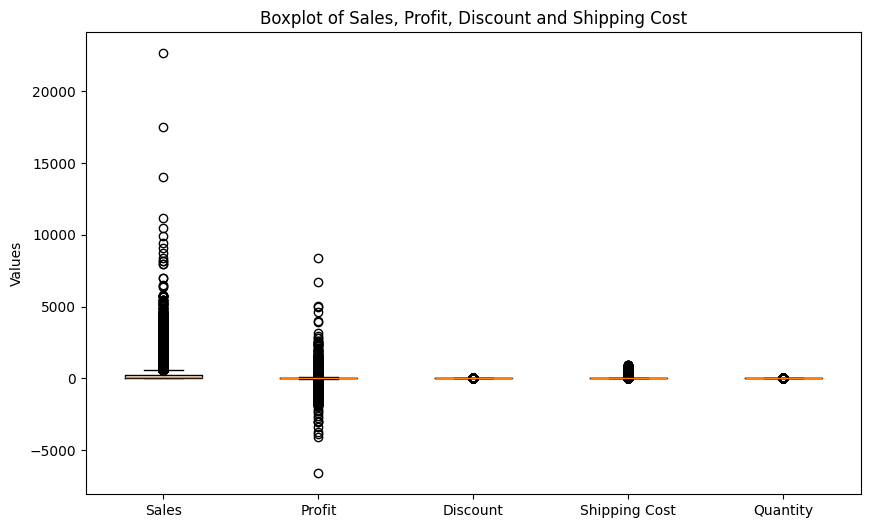

In [12]:
plt.figure(figsize = (10,6))
plt.boxplot([df['Sales'],df['Profit'], df['Discount'], df['Shipping Cost'], df['Quantity']], labels = ['Sales', 'Profit', 'Discount', 'Shipping Cost', 'Quantity'])
plt.title('Boxplot of Sales, Profit, Discount and Shipping Cost')
plt.ylabel('Values')
plt.show()

* When used with a categorical column (e.g., Segment) on the x-axis and a numerical column (e.g., Profit) on the y-axis, it shows the distribution of the numerical data across different categories. This allows for:

* Comparing distributions across categories.
* Identifying outliers in each category.
* Visualizing variability (spread and central tendency) for each category.

C:\Users\gkris\AppData\Local\Temp\ipykernel_15288\1836958417.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Segment', y = 'Profit' , data =df, palette = 'hsv')


<Axes: xlabel='Segment', ylabel='Profit'>

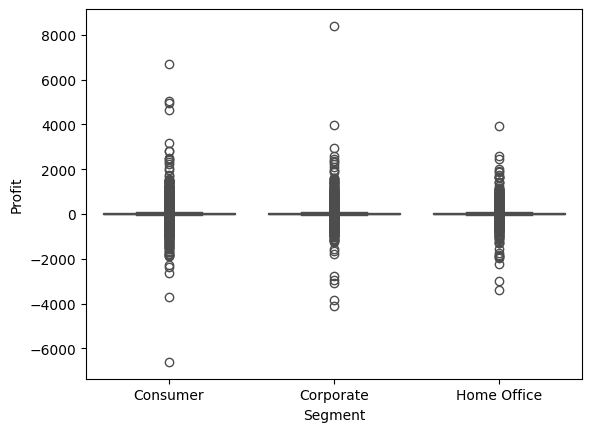

In [13]:
sns.boxplot(x = 'Segment', y = 'Profit' , data =df, palette = 'hsv')

C:\Users\gkris\AppData\Local\Temp\ipykernel_15288\954521025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x = 'Sub-Category' , y ='Profit', data = df, palette = 'Set1')


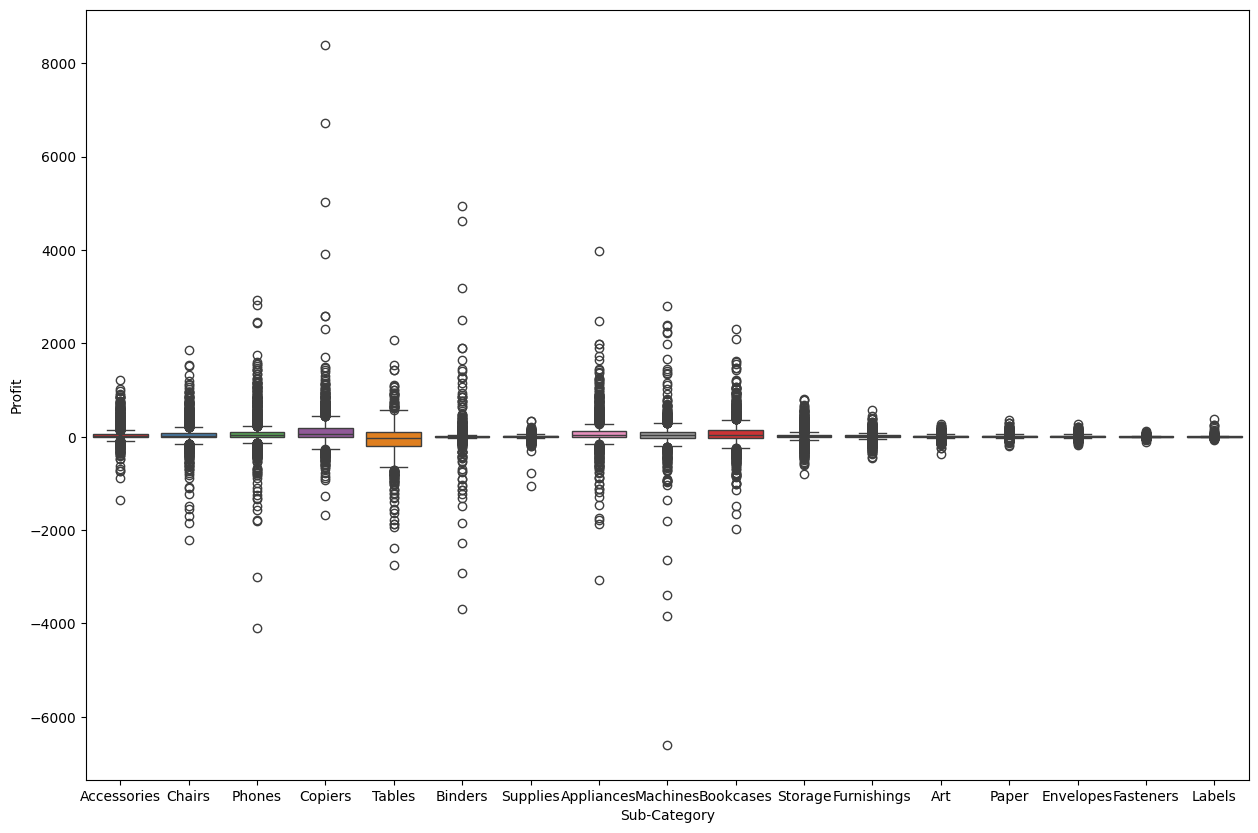

In [14]:
plt.figure(figsize = (15,10))
sns.boxplot( x = 'Sub-Category' , y ='Profit', data = df, palette = 'Set1')
plt.show()

C:\Users\gkris\AppData\Local\Temp\ipykernel_15288\756716628.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Category', y = 'Profit', data =df, palette = 'rainbow')


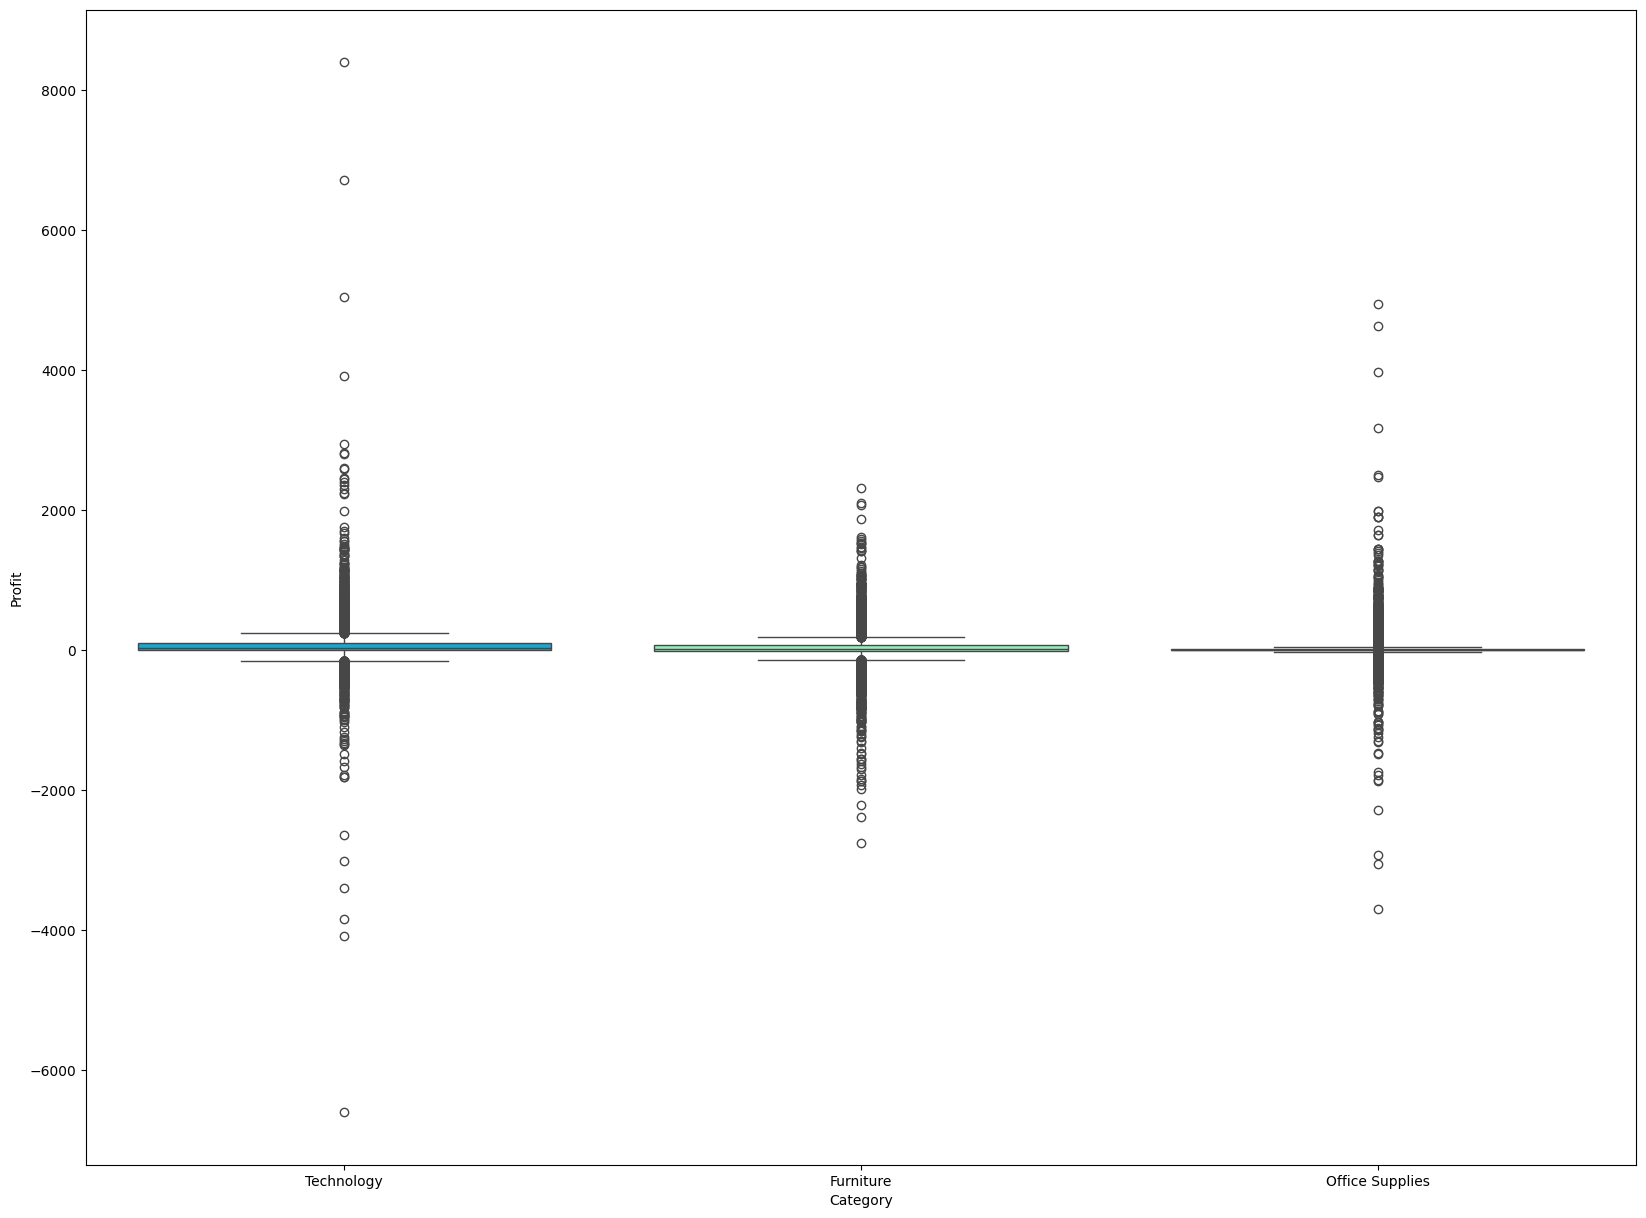

In [15]:
plt.figure(figsize = (20,15))
sns.boxplot(x = 'Category', y = 'Profit', data =df, palette = 'rainbow')
plt.show()

C:\Users\gkris\AppData\Local\Temp\ipykernel_15288\3829176782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Market', y = 'Profit', data = df, palette = 'rainbow')


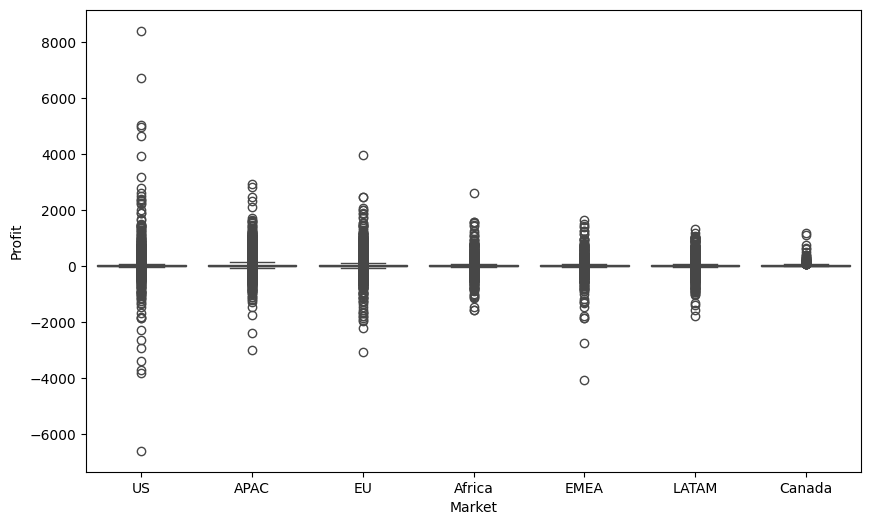

In [17]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Market', y = 'Profit', data = df, palette = 'rainbow')
plt.show()

### Encoding

**5. Encoding Process**

**1. Label Encoding**
* Label Encoding is a technique to convert categorical data into numerical values. It assigns a unique integer to each category, making the data suitable for machine learning models that require numerical inputs.

In [ ]:
df_cat = df[Categorical_columns]

In [47]:
le = LabelEncoder()

In [49]:
df_cat_e = df_cat.apply(le.fit_transform)
df_cat_e.head()

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,1499,1,1286,632,0,2290,703,139,6,6,8246,2,0,2750,0
1,13063,2,808,413,1,3518,702,6,0,9,907,0,5,2525,0
2,12983,0,336,181,0,497,820,6,0,9,10157,2,13,2502,3
3,6813,0,873,424,2,375,145,47,4,3,10146,2,13,2414,3
4,21702,1,1290,632,0,857,270,110,1,0,10249,2,6,3158,0


**2. One Hot Encoding**
* One-Hot Encoding is a method to convert categorical data into a binary (0/1) format. Each unique category in a column is represented by a new column, and a row gets a 1 in the column for its category and 0 elsewhere.

* Method-1
* Pandas provides an easy way to one-hot encode using "pd.get_dummies()".

In [50]:
df_new = pd.get_dummies(df_cat,columns = df_cat.columns)
df_new.shape

(51290, 46428)

* Method-2
* Scikit-learn provides a OneHotEncoder class for one-hot encoding.

In [51]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoded_array = encoder.fit_transform(df_cat)
encoded_df = pd.DataFrame(encoded_array, columns = encoder.get_feature_names_out(df_cat.columns))
encoded_df.shape

(51290, 46428)

### Outliers Removal by using IQR

**6. Outlier detection and removal**

* Outliers are data points that significantly differ from other observations in a dataset. They can occur due to measurement errors, variability in data, or unusual events. Identifying and handling outliers is crucial for improving the performance and accuracy of machine learning models.

* The Interquartile Range (IQR) method is a simple and effective way to detect outliers in numerical data.

In [39]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [41]:
df_num = df[Numerical_columns]

In [ ]:
columns_to_check = ['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
df_no_outliers = remove_outliers_iqr(df_num,columns_to_check)

print("Original DataFrame")
print(df_num.shape)
print("Dataframe after Outlier Treatment")
print(df_no_outliers.shape)

Original DataFrame
(51290, 6)
Dataframe after Outlier Treatment
(30879, 6)


* Where and when to use outliers :
1. Works well for data that is approximately symmetric or non-parametric.
2. Not ideal for highly skewed distributions. In such cases, consider transformations (log, square root) or robust statistical techniques.